## 1. Import the Libraries
NumPy is an open-source Python library used to perform various mathematical and scientific tasks. NumPy is used for working with arrays. It also has functions for working in the domain of linear algebra, Fourier transform, and matrices.

Matplotlib is a plotting library, that is used for creating a figure, plotting an area in a figure, plotting some lines in a plotting area, decorating the plot with labels, etc.

Pandas is a tool used for data wrangling and analysis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Load Dataset

In [ ]:
dataset = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Split Dataset into X and Y

In [ ]:
X = dataset.iloc[:, [2, 3]]
y = dataset.iloc[:, 4]

## 4. Split the X and Y Dataset into the Training set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## 5. Perform Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()   # Normalization

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test
print(X_test[:5])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


In [ ]:
type(X_test)

numpy.ndarray

## SVM Kernals

![image.png](attachment:f320ffb9-869e-4dfb-a852-4cbdf1f4a059.png)

## Fit SVM to the Training

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC (kernel = 'linear', random_state = 0)   # linear poly sigmoid
classifier.fit (X_train, y_train)

SVC(kernel='linear', random_state=0)

## 6. Predict the Test Set results

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

## 7. Make the Confusion Matrix

![image.png](attachment:5b2ee621-e792-48c0-af8b-bf75b367fbb0.png)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


In [ ]:
accuracy_score(y_test, y_pred)

0.9

## Visualise the test set results

<ipython-input-19-5eaa387b6804>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


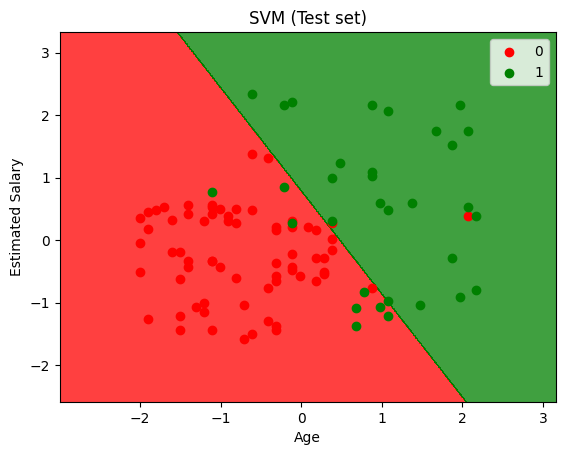

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()